In [1]:
# conda install fastai


In [1]:
from fastai import *
import fastai
from fastai.text.all import *
# from fastai.text import *
# from fastai.test_utils import *
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
import torch
torch.cuda.is_available()
# fastai.__version__

True

In [3]:
path = Path('./data')

df = pd.read_csv(path/'final_cleaned_data.csv')

In [4]:
bs = 20

In [5]:
df.head()

,Unnamed: 0,text
0,0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest
1,1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest
2,2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.
3,3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest"
4,4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …


In [6]:
df=df.iloc[:, 1:]

In [7]:
df.head()

,text
0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest
1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest
2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.
3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest"
4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …


In [9]:
# df = df.sample(n=200000, random_state=30)

In [10]:
# !conda install --file requirements.txt


In [8]:
print(fastai.__version__)

2.5.3


In [9]:
valid = np.random.choice([False,True], len(df['text']), p= [0.9, 0.1])
df['is_valid'] = valid
df.head()

,text,is_valid
0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest,False
1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest,False
2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.,False
3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest",False
4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …,False


In [10]:
# from lang_model import *
# data_lm = lang_model(df, path, 'text', bs)
data_lm = DataBlock(blocks=TextBlock.from_df('text', is_lm=True),
                    get_x=ColReader('text'),
                    splitter=ColSplitter())
dls = data_lm.dataloaders(df, bs=bs, seq_len=72)
dls.show_batch(max_n=6)


,text,text_
0,xxbos xxmaj haryana farmers hit back after xxup cm xxup ml xxmaj khattar links # farmersprotest to terrorism and claims ones ' protesting are not from our state ' # xxunk # anti_farmer_bjp # takebackfarmlaws _ xxunk xxbos xxmaj thanks for showing your concern # farmersprotest xxbos xxmaj very well said 🙏 # farmersprotest xxrep 3 🚜 🌾 🌽 🙏 ✊ xxbos # modiglobaldisaster # modibuildbridgesnotwalls thanks for your much needed support,xxmaj haryana farmers hit back after xxup cm xxup ml xxmaj khattar links # farmersprotest to terrorism and claims ones ' protesting are not from our state ' # xxunk # anti_farmer_bjp # takebackfarmlaws _ xxunk xxbos xxmaj thanks for showing your concern # farmersprotest xxbos xxmaj very well said 🙏 # farmersprotest xxrep 3 🚜 🌾 🌽 🙏 ✊ xxbos # modiglobaldisaster # modibuildbridgesnotwalls thanks for your much needed support thanks
1,"to hear your thoughts on the # farmersprotest here on xxmaj for those of you who do n’t know , rami is a major advocate for social injustice and is very active on xxmaj instagram : xxunk _ xxbos xxmaj farmers are protesting peacefully for months now keep supporting # farmersprotest xxbos xxmaj important announcement n xxmaj clarification by xxup skm # farmersprotest xxbos # farmersprotest # boycottjio # whothehellisgodse # किसान_एकता_जिन्दाबाद","hear your thoughts on the # farmersprotest here on xxmaj for those of you who do n’t know , rami is a major advocate for social injustice and is very active on xxmaj instagram : xxunk _ xxbos xxmaj farmers are protesting peacefully for months now keep supporting # farmersprotest xxbos xxmaj important announcement n xxmaj clarification by xxup skm # farmersprotest xxbos # farmersprotest # boycottjio # whothehellisgodse # किसान_एकता_जिन्दाबाद #"
2,xxmaj question everything . # farmersprotest # nofarmersnofood xxmaj can you outsmart a troll ? xxunk / sta … xxbos # farmersdayingmodienjoying more than farmers have already given their life for # farmersprotest . is enjoying dances and still have n’t given a single statement . xxmaj he ’s such a ruthless dictator . # shameonmodigovt xxbos xxmaj hahaha it looks like you are already suffering from xxmaj xxunk from consuming cow,question everything . # farmersprotest # nofarmersnofood xxmaj can you outsmart a troll ? xxunk / sta … xxbos # farmersdayingmodienjoying more than farmers have already given their life for # farmersprotest . is enjoying dances and still have n’t given a single statement . xxmaj he ’s such a ruthless dictator . # shameonmodigovt xxbos xxmaj hahaha it looks like you are already suffering from xxmaj xxunk from consuming cow dung
3,"ca n’t sleep ) at xxmaj delhi xxmaj borders in this bone chilling winter . xxmaj government is xxmaj arrogant , xxmaj judiciary is mum , xxmaj media ( fourth pillar ) is calling it picnic . is xxmaj democracy so xxmaj cruel & xxmaj insensitive ? # farmersprotest … xxbos # farmersprotest # anyone who support the farmers faces xxup fir . xxmaj just find a solution and listen to farmers","n’t sleep ) at xxmaj delhi xxmaj borders in this bone chilling winter . xxmaj government is xxmaj arrogant , xxmaj judiciary is mum , xxmaj media ( fourth pillar ) is calling it picnic . is xxmaj democracy so xxmaj cruel & xxmaj insensitive ? # farmersprotest … xxbos # farmersprotest # anyone who support the farmers faces xxup fir . xxmaj just find a solution and listen to farmers grievances"
4,farmacts in # xxmaj abeyance in t / o twts to ji is xxup needed now ! xxbos xxmaj we support our xxmaj farmers ! ! # fencinglikechinapak # farmersprotest … xxbos xxmaj we xxmaj united xxmaj for xxmaj farmers xxmaj we are xxup one # farmersabovereligioushate # farmersprotest xxbos xxmaj godi xxmaj media need to watch reality of xxmaj farmers xxmaj protest and xxmaj women xxmaj day at xxmaj delhi xxmaj,in # xxmaj abeyance in t / o twts to ji is xxup needed now ! xxbos xxmaj we support our xxmaj farmers ! ! # fencinglikechinapak # farmersprotest … xxbos xxmaj we x

In [11]:
learn = language_model_learner(dls, AWD_LSTM, metrics=accuracy,drop_mult=0.3)

In [14]:

# data_lm = (TextList.from_csv(csv_name='final_cleaned_data.csv', path=path, cols='text')
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data_lm.pkl')

In [12]:
import gc
# del variables
gc.collect()
torch.cuda.empty_cache()

SuggestedLRs(valley=0.0020892962347716093)

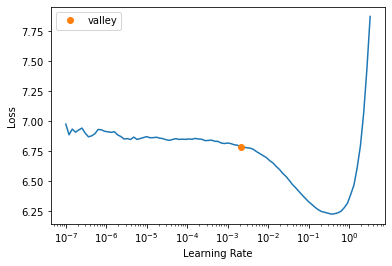

In [13]:
learn.lr_find()
# learn.recorder.plot(skip_end=15)

In [17]:
# lrs,moms = learn.recorder.,learn.recorder.hps['mom']

In [14]:
learn.fit_one_cycle(1, 0.0020892962347716093, moms=(0.8,0.75, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.780380,3.633222,0.355888,1:47:55


In [15]:
learn.save('fit_head')

Path('models/fit_head.pth')

In [16]:
learn.load('fit_head')

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(10, 0.00020892962347716093,cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3),SaveModelCallback(monitor='accuracy', min_delta=0.01)], moms=(0.8,0.75,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.485758,3.418579,0.384397,2:03:51
1,3.364655,3.255469,0.409624,2:03:36
2,3.219054,3.158205,0.424908,2:03:31
3,3.105550,3.104273,0.434011,2:03:31
4,3.089722,3.066870,0.440533,2:03:30
5,3.027117,3.041426,0.444992,2:03:29
6,2.953732,3.025707,0.447964,2:03:32
7,2.952369,3.014702,0.450352,2:03:34


Better model found at epoch 0 with accuracy value: 0.38439738750457764.
Better model found at epoch 1 with accuracy value: 0.4096237123012543.
Better model found at epoch 2 with accuracy value: 0.4249083399772644.
Better model found at epoch 4 with accuracy value: 0.4405326843261719.
No improvement since epoch 4: early stopping


In [19]:
learn.save('fine_tuned')

Path('models/fine_tuned.pth')

In [20]:
learn.load('fine_tuned')

In [21]:
learn.predict('covidiots', n_words=40)

'covidiots style of this # BJP # farmersprotest … a water overlooked but despite facing storms , are still penniless , what are their demands prabhu , increased land ache cases hu punjab . # tomarrepealonlysolution # farmersprotest'